# Galaxy classification
This is a ML code that performs galaxy classification using user-defined labels from the Galaxy-Zoo (http://zoo1.galaxyzoo.org/) project. 

The steps are the following: <br>
1. Import libraries and sample
2. Split sub-samples (training, validation, testing)
3. Fit with various classifier and check performance
4. Compare various classifiers in testing sample

In [1]:
# Importing Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets, svm, utils, metrics
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter('ignore')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


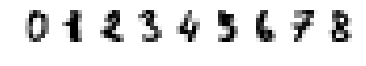

In [13]:
# In this part we are going to upload the galaxy images. 
# For now I use a dataset of digits from scikit-learn
# I plot some examples
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:9]):
    plt.subplot(2, 9, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     plt.title('Training: %i' % label)

In [15]:
# Here we are going to use astropy to read fits images and convert them into 
# similar format matrices

## 1) Using scikit-learn / SVM classifier
We are going to test the performance of a classical Support Vector Machines classifier

In [3]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
labels = digits.target

# Splitting in training, validation, and test samples
n_samples = len(digits.images)

data_train = data[:8 * n_samples // 10] # i.e. 80% training
labels_train = labels[:8 * n_samples // 10]

data_valid = data[8 * n_samples // 10:9 * n_samples // 10] # i.e. 10% validation (80->90%)
labels_valid = labels[8 * n_samples // 10:9 * n_samples // 10]

data_test = data[9 * n_samples // 10:] # i.e. 10% testing (90->100%)
labels_test = labels[9 * n_samples // 10:]

In [4]:
# Classifier
model_svc = SVC(gamma=0.001)
model_svc.fit(data_train, labels_train)

# Comparisong with prediction
predicted = model_svc.predict(data_valid)

print("Classification report for %s:\n%s\n"
      % (model_svc, metrics.classification_report(labels_valid, predicted)))
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels_valid, predicted))

Classification report for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        19
          1       0.94      1.00      0.97        17
          2       1.00      1.00      1.00        18
          3       1.00      0.89      0.94        19
          4       0.94      0.94      0.94        17
          5       1.00      1.00      1.00        19
          6       1.00      1.00      1.00        19
          7       0.94      1.00      0.97        17
          8       0.93      0.88      0.90        16
          9       0.90      1.00      0.95        19

avg / total       0.97      0.97      0.97       180




## 2) Using scikit-learn / Multilayer perceptron classifier
We are going to use a simple Neural Network (Multilayer perceptron) classifier.

In [5]:
# Classifier
model_MLP = MLPClassifier()
model_MLP.fit(data_train, labels_train)

# Comparisong with prediction
predicted = model_MLP.predict(data_valid)

print("Classification report for %s:\n%s\n"
      % (model_MLP, metrics.classification_report(labels_valid, predicted)))
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels_valid, predicted))

Classification report for MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        19
          1       0.89      0.94      0.91        17
          2       1.00      1.00      1.00        18
          3       1.00      0.84      0.91        19
          4       0.89      0.94      0.91        17
          5       0.90      1.00      0.95        19
          6       1.00      0.95      0.97        19
          7       0.84      0.94      0.89        17
          8       0.73      0.69      0.71        16
        

## 3) Using scikit learn / Random Forests
We are using a a scikit-learn bagging classifier.

In [6]:
# Classifier
model_RF = RandomForestClassifier()
model_RF.fit(data_train, labels_train)

# Comparisong with prediction
predicted = model_RF.predict(data_valid)

print("Classification report for %s:\n%s\n"
      % (model_RF, metrics.classification_report(labels_valid, predicted)))
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels_valid, predicted))

Classification report for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       0.89      0.89      0.89        19
          1       0.76      0.76      0.76        17
          2       0.89      0.94      0.92        18
          3       0.94      0.89      0.92        19
          4       0.80      0.94      0.86        17
          5       1.00      0.89      0.94        19
          6       0.95      0.95      0.95        19
          7       0.83      0.88      0.86        17
          8       0.86      0.75      0.80        16
          9       0.7

## 4) Using Keras simple Neural Network classifier
We are using a simple multilayer perceptron classifier.

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [8]:
# Normalizing data to 0-1 range
data = data / np.max(data[:])

num_pixels = data_train.shape[1] 

# Since the output variable is an integer 0-9. 
# This is a multi-class classification problem. 
# It is good practice to use a one hot encoding 
# of the class values, transforming the vector 
# of class integers into a binary matrix.
uniques, labels_valid = np.unique(labels_valid, return_inverse=True)
labels_train_cat = np_utils.to_categorical(labels_train)
labels_valid_cat = np_utils.to_categorical(labels_valid)
num_classes = labels_valid_cat.shape[1]

In [12]:
# Define the model
def baseline_model():
    # create model
    model_Ker = Sequential()
    model_Ker.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', 
                                                                activation='relu'))
    model_Ker.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model_Ker.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_Ker

# Build the model
model_Ker = baseline_model()

In [10]:
# Fit the model
model_Ker.fit(data_train, labels_train_cat, validation_data=(data_valid, labels_valid_cat), 
                                            epochs=30, batch_size=100, verbose=2)

# Comparisong with prediction
predicted = model_Ker.predict(data_valid)

Train on 1437 samples, validate on 180 samples
Epoch 1/30
 - 0s - loss: 1.8855 - acc: 0.4168 - val_loss: 1.5032 - val_acc: 0.6444
Epoch 2/30
 - 0s - loss: 1.2161 - acc: 0.7773 - val_loss: 1.1140 - val_acc: 0.7278
Epoch 3/30
 - 0s - loss: 0.8218 - acc: 0.8594 - val_loss: 0.8633 - val_acc: 0.7556
Epoch 4/30
 - 0s - loss: 0.6074 - acc: 0.8873 - val_loss: 0.7509 - val_acc: 0.7778
Epoch 5/30
 - 0s - loss: 0.4752 - acc: 0.9137 - val_loss: 0.6758 - val_acc: 0.8056
Epoch 6/30
 - 0s - loss: 0.3897 - acc: 0.9325 - val_loss: 0.5996 - val_acc: 0.8278
Epoch 7/30
 - 0s - loss: 0.3331 - acc: 0.9339 - val_loss: 0.5767 - val_acc: 0.8333
Epoch 8/30
 - 0s - loss: 0.2954 - acc: 0.9429 - val_loss: 0.5337 - val_acc: 0.8333
Epoch 9/30
 - 0s - loss: 0.2600 - acc: 0.9450 - val_loss: 0.5346 - val_acc: 0.8333
Epoch 10/30
 - 0s - loss: 0.2366 - acc: 0.9548 - val_loss: 0.5191 - val_acc: 0.8278
Epoch 11/30
 - 0s - loss: 0.2175 - acc: 0.9555 - val_loss: 0.4837 - val_acc: 0.8444
Epoch 12/30
 - 0s - loss: 0.1994 - acc

In [11]:
# Reverse one hot encoding
pred = uniques[predicted.argmax(1)]

print("Classification report for %s:\n%s\n"
      % (model_Ker, metrics.classification_report(labels_valid, pred)))
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels_valid, pred))

Classification report for <keras.engine.sequential.Sequential object at 0x12667cd68>:
             precision    recall  f1-score   support

          0       1.00      0.84      0.91        19
          1       0.75      0.53      0.62        17
          2       1.00      1.00      1.00        18
          3       0.94      0.89      0.92        19
          4       0.94      0.94      0.94        17
          5       0.86      1.00      0.93        19
          6       0.90      0.95      0.92        19
          7       0.94      0.88      0.91        17
          8       0.73      0.69      0.71        16
          9       0.65      0.89      0.76        19

avg / total       0.87      0.87      0.86       180




https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

## 5) Using Tensorflow
https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/neural_network_raw.ipynb

https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/neural_network.ipynb